# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Project Outline
**Methodology:** for that matter, a [CRISP-DM](https://www.sv-europe.com/crisp-dm-methodology/) approach will be used to cover the following main parts:  
- **Business Understanding:** understanding of how are the operations, how the data can be used to support them and what are the main objectives of the project.
- **Data Understanding & Preparation:** explore the data to observe the available information, any potential problems and constraints. In addition, any data related issues discovered here will be addressed as the data is ultimately prepared for modeling.
- **Data Modeling:** test different modeling approaches and optimize the one(s) with a better initial performance.
- **Evaluate the Results:** evaluate the results produced by the optimized classifier and understand how the outputs can best support the business.

On this notebook, the first 2 parts will be covered. Both `modeling` and `results evaluations` will be covered in `Starbucks_Capstone_notebook_part2.ipynb` file.

# Business Understanding

The dataset portraits a common retailer scenario, where the company sends out offers to its customers in order to keep them engaged and maintain its customer base. As mentioned earlier, this is a simplification of the regular data Starbucks has, but nonetheless the principles and logic behind organizing, cleaning and modeling could also be applied in a real case.

With that in mind, below are the main points to discuss before we start the analysis:

**Goal: The current project aims to predict if an offer will be successful given customer demographic information, as well as some of the offer's characteristics.** For that, 2 tables will be used: one containing the similar offers of `BOGO` (buy one and get one), as well as `discount`; and a second containing `informational` offers. The criterias to identify a successful offer are:

- **BOGO & discount offers:** for these offers to be considered successful, these events need to happen in sequence:
- > **offer received >> offer viewed >> transaction >> offer completed**

If these events take place in sequence for the same offer, we will consider it successful and our target for it will be `1`.

- **informational offer:** in this case we will need to observe the following:
- > **offer received >> offer viewed >> transaction**

If these events are seen in this order AND the transaction takes place during the influence period of the offer (variable `duration`), we will consider it successful and the target will also be `1`.

For all other scenarios, the offers will be considered unsuccessful and the target will be `0`.

Given these parameters, this is a supervised classification problem that will be approached by creating a benchmark model based on sklearn's `DummyClassifier` that will always predict the most common value. this way, if there are more negative cases in the data, the model will always predict `0`. Next, some other modeling techniques will be tested first without parameter tunning and the best model will be seleced for optimization.

During optimization, `RandomizedSearchCV` will be used for hyper-parameter tunning so that the models can present better results. After that, the metrics proposed will be evaluated and conlusions about the feasibility of the task will be made, as well as considerations about potential improvements.

Potential metrics to evaluate the task's success are:
- [`accuracy score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): according to the Scikit-Learn documentation, _the accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions._ This metric is widely used in such classification problems and it's best used for more balanced datasets (when the number of positive and negative cases are similar).
- [`f1 score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): similarly, the F1 Score also evaluates the performance of the classifier, but as it takes into account both precision (_the ability of the classifier not to label as positive a sample that is negative_) and recall (_the ability of the classifier to find all the positive samples_), it normally has more evaluation power in unbalanced datasets. In fact, this is the harmonic mean of precision and recall and is defined as: `F1 = 2 * (precision * recall) / (precision + recall)`  Source: Scikit-Learn Documentation.

For both metrics, the higher, the better. In addition to these, other supporting evaluation metrics provided by the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) and [ROC Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) will be used.


But first things first: let's dive into the data so we can understand it before we can model it!

## Data load

In [1]:
import sys
print(sys.version)

3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [86]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns=100

from sklearn.preprocessing import MultiLabelBinarizer

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [87]:
portfolio.shape, profile.shape, transcript.shape

((10, 6), (17000, 5), (306534, 4))

In [88]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [89]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [90]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


These the files provided and now the data exploration part begins.

# Data Understanding & Preparation
This is the initial step is the data analysis and modeling task, as only after having a clear view of the information available one can assess if the task can be solved, or if more data is needed (samples and or features).

Needless to say, the data needs to be understood so that any potential problems can be properly addressed. As necessary adjustments are being uncovered, they are also being applied to the tables. Reason why the steps of `Data Understanding` & `Preparation` will be performed together.

Let's proceed.

## null values and data types

In [91]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
reward        10 non-null int64
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
offer_type    10 non-null object
id            10 non-null object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [92]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 17000 non-null int64
id                  17000 non-null object
became_member_on    17000 non-null int64
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [93]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
person    306534 non-null object
event     306534 non-null object
value     306534 non-null object
time      306534 non-null int64
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


It seems that there are almost no null values in the data, except in the `income` and `gender` variables from the `profile` data frame. Most data types also seem to have been properly inferred. The exception is the `become_member_on`, which is a data represented as a float. Let's convert it:

In [94]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [95]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 17000 non-null int64
id                  17000 non-null object
became_member_on    17000 non-null datetime64[ns]
income              14825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 664.2+ KB


In [96]:
f'{profile.income.isnull().mean()*100:.2f}% of income variable is null.'

'12.79% of income variable is null.'

`income` will need to be imputed if we want to have the freedom to use any algorithm from, say, scikit-learn. Many of these do not accept missing values. As stated before, data preparation and cleaning tasks will be performed as we uncover necessary corrections. However, this particular one will be left to the end, as we may have derived features that we intend to feed into the models and that could also have missing values. Therefore, it will be performed at the end of the data preparation steps.

Let's proceed.

## unique values

In [97]:
def print_unique(data):
    print('***printing unique values by column***')
    for col in data.columns:
        try:
            print(f'{col}: {data[col].nunique()}')
        except:
            pass
        
print_unique(portfolio)

***printing unique values by column***
reward: 5
difficulty: 5
duration: 5
offer_type: 3
id: 10


In [98]:
print_unique(profile)

***printing unique values by column***
gender: 3
age: 85
id: 17000
became_member_on: 1716
income: 91


In [99]:
print_unique(transcript)

***printing unique values by column***
person: 17000
event: 4
time: 120


In [100]:
len(set(profile.id).intersection(set(transcript.person)))

17000

`transcript` and `profile` have a common id that can be joined.

In [101]:
transcript.head(3)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0


In [102]:
portfolio.head(3)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed


Both `transcript` and `portfolio` tables have 1 column that is a list/dict (`value` and `channels` respectively). These need to be dealt with before modeling.

## numerical features scales

In [103]:
def plot_box(ser, t):
    """
    Plots a boxplot (with figure size adjusted) and the shape of the filtered
    dataframe given a threshold t.
    INPUTS:
        - ser: series of the variable to be plotted
        - t: threshold to filter the data
    OUTPUTS:
        - number of rows after filtering
        - seaborn boxplot
    """
    print(f'Shape of the data with variable greather than provided threshold:\
          {ser[ser > t].shape[0]}')    
    plt.figure(figsize=(22,0.5))
    sns.boxplot(ser);

In [104]:
profile.describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


Shape of the data with variable greather than provided threshold:          2180


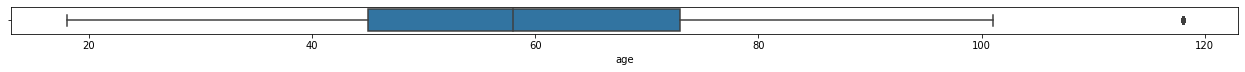

In [105]:
plot_box(profile.age, 100)

In [106]:
profile.age[profile.age == 118].shape

(2175,)

`age` seems to have some extreme values. Almost all customers with age > 100 years have a value of `118`. Hard to believe someone would have 118 years (could be true, but it's unlikely).

Shape of the data with variable greather than provided threshold:          3565


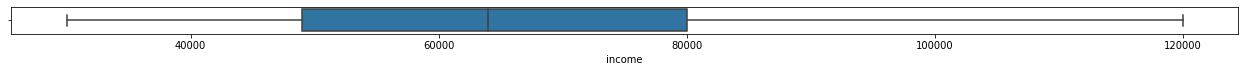

In [107]:
plot_box(profile.income, 80000)

In [108]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


Shape of the data with variable greather than provided threshold:          2


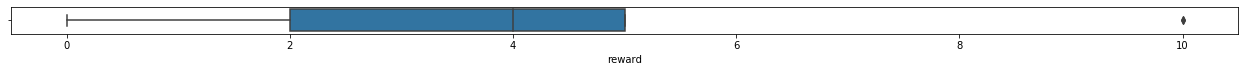

In [109]:
plot_box(portfolio.reward, 5)

Shape of the data with variable greather than provided threshold:          1


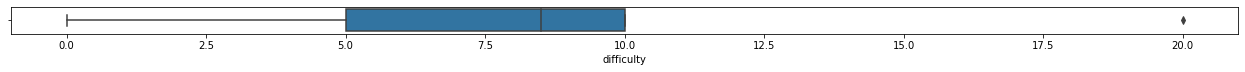

In [110]:
plot_box(portfolio.difficulty, 10)

The variable `difficulty` appears to have a max limit of 10, but there is 1 row with a value of 20. This seems to be an incorrect measurement.

Shape of the data with variable greather than provided threshold:          2


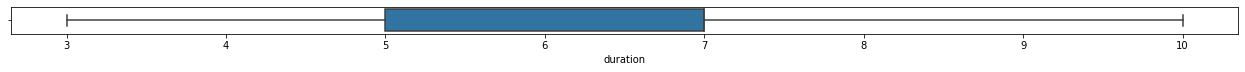

In [111]:
plot_box(portfolio.duration, 7)

Despite some small differences, overall the 3 variables from portfolio table seem to be in the same scale.

In [112]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


Shape of the data with variable greather than provided threshold:          3293


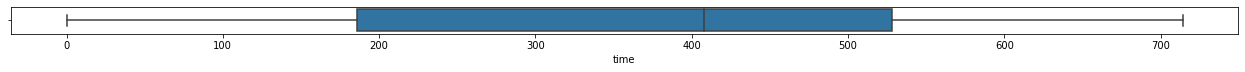

In [113]:
plot_box(transcript.time, 700)

In conclusion, there are similar features that appear to be in the same scale. If we decide to use a linear classifier, some scaling will need to be applied. As we also have in some cases the presence of **outliers**, a robust method, such as `QuantileTransformer` could help mitigate their impact.

## categoricals and other data types

In [114]:
def cat_unique_values(data):
    """
    Prints top-3 most common categorical values for categorical columns in provided data frame.
    It skips the columns that have a data type of list and dict.
    """
    for var in data.columns:
        try:
            if data[var].dtype == 'O':
                nuniq = data[var].nunique()
                top3 = data[var].value_counts().index.values[:3]
                nulls = data[var].isnull().mean()*100
                print(f'||{var}||')
                print(f'- unique values: {nuniq}')
                print(f'- top3: {top3}')
                print(f'- nulls: {nulls:.2f}%\n')
        except:
            pass

In [115]:
cat_unique_values(portfolio)

||offer_type||
- unique values: 3
- top3: ['bogo' 'discount' 'informational']
- nulls: 0.00%

||id||
- unique values: 10
- top3: ['2906b810c7d4411798c6938adc9daaa5' '5a8bc65990b245e5a138643cd4eb9837'
 '9b98b8c7a33c4b65b9aebfe6a799e6d9']
- nulls: 0.00%



In [116]:
cat_unique_values(profile)

||gender||
- unique values: 3
- top3: ['M' 'F' 'O']
- nulls: 12.79%

||id||
- unique values: 17000
- top3: ['c6c1259f6fbc4e6c82a7b9dd3c83f636' '655e69c1a733416c983ad91f1230d6e1'
 'f316fd04821d4f7aa83cf5f8702b5bc8']
- nulls: 0.00%



As mentioned before, there are missing values in the `gender` variable and the 3 possible values of it are represented. Let's see it's distribution:

In [117]:
round((profile.gender.value_counts(dropna=False)/profile.shape[0])*100,2)

M      49.91
F      36.05
NaN    12.79
O       1.25
Name: gender, dtype: float64

The `Other` value is occurs very rarely in the data and it could represent customers who identify themselves with a different gender preference other than `Male` and `Female`, or even perhaps those that do not want to inform it. Since we can't correctly infer the missing values, they will remain as such and will be labeled as `Unknown`.

In [118]:
profile['gender'] = profile['gender'].fillna('Unknown')

In [119]:
cat_unique_values(transcript)

||person||
- unique values: 17000
- top3: ['94de646f7b6041228ca7dec82adb97d2' '8dbfa485249f409aa223a2130f40634a'
 '5e60c6aa3b834e44b822ea43a3efea26']
- nulls: 0.00%

||event||
- unique values: 4
- top3: ['transaction' 'offer received' 'offer viewed']
- nulls: 0.00%



In [120]:
round((transcript.event.value_counts(dropna=False)/transcript.shape[0])*100,2)

transaction        45.33
offer received     24.88
offer viewed       18.83
offer completed    10.95
Name: event, dtype: float64

## Transforming categorical variables

### Getting dummies
- The variables that have lists and dicts will be dealt with in the next section.

In [121]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [122]:
portfolio['offer_type_original'] = portfolio['offer_type'].copy()
portfolio = pd.get_dummies(data=portfolio, columns=['offer_type'])
portfolio.head()

,reward,channels,difficulty,duration,id,offer_type_original,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0
1,10,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1,0,0
2,0,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,1
3,5,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,0,0
4,5,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,0,1,0


`offer_type` is dealt with and the only variable left will be `channels`, which will have to be dealth with in a different way.

Now let's see the other data frames.

In [123]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [124]:
transcript['event_original'] = transcript['event'].copy()
transcript = pd.get_dummies(data=transcript, columns=['event'])
transcript.head()

,person,value,time,event_original,event_offer completed,event_offer received,event_offer viewed,event_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer received,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer received,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer received,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer received,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer received,0,1,0,0


Like in before, we got the dummies from 1 column (`event`) and there is still one remaining that requires special treatment. Both will be dealt in the next section.

In [125]:
profile.head()

,gender,age,id,became_member_on,income
0,Unknown,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,Unknown,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,Unknown,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [126]:
profile['gender_original'] = profile['gender'].copy()
profile = pd.get_dummies(data=profile, columns=['gender'])
profile.head()

,age,id,became_member_on,income,gender_original,gender_F,gender_M,gender_O,gender_Unknown
0,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,Unknown,0,0,0,1
1,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,F,1,0,0,0
2,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,Unknown,0,0,0,1
3,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,F,1,0,0,0
4,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,Unknown,0,0,0,1


As for the `became_member_on`, we can also create supporting columns. Let's see:

In [127]:
profile = profile.assign(year=profile.became_member_on.dt.year,#.astype(str),
                         month=profile.became_member_on.dt.month,#.astype(str),
                         day=profile.became_member_on.dt.day,#.astype(str),
                         week=profile.became_member_on.dt.week)#.astype(str))
#profile.drop('became_member_on', axis=1, inplace=True)
profile.head()

,age,id,became_member_on,income,gender_original,gender_F,gender_M,gender_O,gender_Unknown,year,month,day,week
0,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,Unknown,0,0,0,1,2017,2,12,6
1,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,F,1,0,0,0,2017,7,15,28
2,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,Unknown,0,0,0,1,2018,7,12,28
3,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,F,1,0,0,0,2017,5,9,19
4,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,Unknown,0,0,0,1,2017,8,4,31


In [128]:
profile.became_member_on.min(), profile.became_member_on.max()

(Timestamp('2013-07-29 00:00:00'), Timestamp('2018-07-26 00:00:00'))

## dealing with `list` and `dict` type columns

### `portfolio` df and the `channels` columns of dtype `list`

In [129]:
portfolio.head()

,reward,channels,difficulty,duration,id,offer_type_original,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0
1,10,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1,0,0
2,0,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,1
3,5,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,0,0
4,5,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,0,1,0


In [130]:
max([len(row.values[0]) for i,row in portfolio[['channels']].iterrows()])

4

There are 4 distinct values in the column `channels`. Let's create dummy variables from it with sklearn's `MultiLabelBinarizer`:

In [131]:
mlb_list = MultiLabelBinarizer()
mlb_list.fit(portfolio['channels'])

channel_dummies = pd.DataFrame(mlb_list.transform(portfolio['channels']),
                               columns=['channel_'+val for val in mlb_list.classes_])
portfolio = pd.concat([portfolio.drop('channels', axis=1), channel_dummies], axis=1)
portfolio.head()

,reward,difficulty,duration,id,offer_type_original,offer_type_bogo,offer_type_discount,offer_type_informational,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,1,1,1,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1,0,0,1,1,1,1
2,0,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,1,1,1,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,0,0,1,1,0,1
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,0,1,0,1,0,0,1


Now the `channel` column is properly organized in the table.

### `transcript` df and the `value` columns of dtype `dict`

In [132]:
transcript.head()

,person,value,time,event_original,event_offer completed,event_offer received,event_offer viewed,event_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer received,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer received,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer received,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer received,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer received,0,1,0,0


In [133]:
transcript = pd.concat([transcript.drop('value', axis=1),
                        transcript['value'].apply(pd.Series)], axis=1)
transcript['offer_id'] = np.where(pd.notnull(transcript['offer id']),transcript['offer id'],transcript['offer_id'])
transcript.drop('offer id', axis=1, inplace=True)
transcript.head()

,person,time,event_original,event_offer completed,event_offer received,event_offer viewed,event_transaction,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,offer received,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,offer received,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,0,offer received,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,offer received,0,1,0,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,offer received,0,1,0,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [134]:
transcript[transcript.amount.notnull()].shape

(138953, 10)

In [135]:
transcript.event_transaction[transcript.amount.notnull()].mean()

1.0

In [136]:
transcript.shape

(306534, 10)

In [137]:
transcript.offer_id.nunique()

10

In [138]:
# reward notnull
transcript[transcript.reward.notnull()][[c for c in transcript.columns if 'event_' in c]].drop_duplicates()

,event_original,event_offer completed,event_offer received,event_offer viewed,event_transaction
12658,offer completed,1,0,0,0


In [139]:
# reward isnull
transcript[transcript.reward.isnull()][[c for c in transcript.columns if 'event_' in c]].drop_duplicates()

,event_original,event_offer completed,event_offer received,event_offer viewed,event_transaction
0,offer received,0,1,0,0
12650,offer viewed,0,0,1,0
12654,transaction,0,0,0,1


In [140]:
transcript.reward.nunique()

4

Now the column `value` is properly organized in the table.

## Merging the data

Many cleaning and individual preprocessing steps were already performed. It's time to put the individual tables together to join offer information with customer demographic data.

In [141]:
for df in [profile, portfolio, transcript]:
    df.columns = [c.replace(' ','_') for c in df.columns]

In [142]:
profile.head(2)

,age,id,became_member_on,income,gender_original,gender_F,gender_M,gender_O,gender_Unknown,year,month,day,week
0,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,Unknown,0,0,0,1,2017,2,12,6
1,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,F,1,0,0,0,2017,7,15,28


In [143]:
portfolio.head(2)

,reward,difficulty,duration,id,offer_type_original,offer_type_bogo,offer_type_discount,offer_type_informational,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,0,0,1,1,1,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1,0,0,1,1,1,1


In [144]:
transcript.head(2)

,person,time,event_original,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,offer received,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,offer received,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN


In [145]:
profile.shape, portfolio.shape, transcript.shape

((17000, 13), (10, 12), (306534, 10))

In [146]:
step1 = pd.merge(left=profile,
                 left_on='id',
                 
                 right=transcript,
                 right_on='person',
                 
                 how='inner')

print(step1.shape, step1['id'].nunique(), profile['id'].nunique(), transcript.person.nunique())

step1.drop('id', axis=1, inplace=True)

(306534, 23) 17000 17000 17000


In [147]:
step2 = pd.merge(left=step1,
                 left_on='offer_id',
                 
                 right=portfolio.drop('reward', axis=1),
                 right_on='id',
                 
                 how='left') # as transactions have no offer_id

print(step1.shape, step2.shape, step2['id'].nunique(), portfolio['id'].nunique(), step1.offer_id.nunique(), step2.offer_id.nunique(), )

(306534, 22) (306534, 33) 10 10 10 10


In [148]:
# select columns (and column order)
selected_cols = ['person', 'offer_id', 'time',
                 
                 'event_original',
                 'event_offer_received', 'event_offer_viewed',
                 'event_transaction','event_offer_completed',
                 
                 'amount','reward', 'difficulty','duration',
                 
                 'offer_type_original',
                 'offer_type_bogo', 'offer_type_discount','offer_type_informational',
                 'channel_email', 'channel_mobile','channel_social', 'channel_web',
                 
                 'age', 'income', 'gender_original',
                 'gender_F', 'gender_M', 'gender_O', 'gender_Unknown',
                 
                 'became_member_on', 'year', 'month', 'day', 'week',
                ]

# select and define column order + drop duplicates
df = step2[selected_cols].drop_duplicates().sort_values(by=['person', 'time']).reset_index(drop=True).copy()
df['offer_id'] = df['offer_id'].ffill()


event_vars = ['event_offer_received', 'event_offer_viewed',
              'event_transaction','event_offer_completed']

sort_vars = ['person', 'offer_id', 'time'] + event_vars

df.sort_values(by=sort_vars, ascending=[True, True, True, False, False, False, False], inplace=True)

# creates unique id per offer received in dataset
df.loc[df.event_offer_received==1,'received_id'] = range(df.event_offer_received.sum())
df['received_id'] = df['received_id'].ffill()

df = df[['received_id'] + selected_cols]

print(df.shape)
df.head()

(306137, 33)


,received_id,person,offer_id,time,event_original,event_offer_received,event_offer_viewed,event_transaction,event_offer_completed,amount,reward,difficulty,duration,offer_type_original,offer_type_bogo,offer_type_discount,offer_type_informational,channel_email,channel_mobile,channel_social,channel_web,age,income,gender_original,gender_F,gender_M,gender_O,gender_Unknown,became_member_on,year,month,day,week
14,0.0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,offer received,1,0,0,0,NaN,NaN,10.0,7.0,discount,0.0,1.0,0.0,1.0,1.0,0.0,1.0,33,72000.0,M,0,1,0,0,2017-04-21,2017,4,21,16
15,0.0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,transaction,0,0,1,0,10.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,72000.0,M,0,1,0,0,2017-04-21,2017,4,21,16
16,0.0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,offer completed,0,0,0,1,NaN,2.0,10.0,7.0,discount,0.0,1.0,0.0,1.0,1.0,0.0,1.0,33,72000.0,M,0,1,0,0,2017-04-21,2017,4,21,16
17,0.0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,660,transaction,0,0,1,0,12.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,72000.0,M,0,1,0,0,2017-04-21,2017,4,21,16
18,0.0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,690,transaction,0,0,1,0,28.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,72000.0,M,0,1,0,0,2017-04-21,2017,4,21,16


The column `received_id` identifies each unique received offer in the dataset. This will serve for the following preparation steps.

Finally, the dataset is organized and it will be splitted into 2 since different offers will be treated differently. These are:
- 1 will contain the `BOGO` and `discount` offers
- 1 will contain the `informational` offers

In [149]:
bogodis_offers = df['offer_id'][(df.offer_type_bogo == 1) | (df.offer_type_discount == 1)].unique()
bogodis = df[df.offer_id.isin(bogodis_offers)].copy()

informational_offers = df['offer_id'][df.offer_type_informational == 1].unique()
informational = df[df.offer_id.isin(informational_offers)].copy()

bogodis.shape, bogodis.received_id.nunique(), informational.shape, informational.received_id.nunique()

((258649, 33), 61486, (47488, 33), 15654)

## target variable
Now it is necessary to organize the table in a way we know the time windows of when the offers were sent and when they reacted (if they reacted at all).

Given that the goal is to model if the customers have responded to an offer. For that purpose, there are 2 possible scenarios:

- **BOGO & discount offers:** for these offers to be considered successful, these events need to happen in sequence:
- > **offer received >> offer viewed >> transaction >> offer completed**

If these events take place in sequence for the same offer, we will consider it successful and our target for it will be `1`.

- **informational offer:** in this case we will need to observe the following:
- > **offer received >> offer viewed >> transaction**

If these events are seen in this order AND the transaction takes place during the influence period of the offer (variable `duration`), we will consider it successful and the target will also be `1`.

For all other scenarios, the target will be `0`.

### target: BOGO & Discount offers
Here is important that all 4 events occur in a specific order:
- **offer received >> offer viewed >> transaction >> offer completed**

In [151]:
def create_event_sequence(data):
    """
    Creates a column with a list of events where each event is represented by
    a number. These are:
        - offer received: 1
        - offer viewed: 2
        - transaction made: 3
        - offer completed: 4
    
    This column is then put into a list where each unique offer (identified by
    the 'received_id' column) will have it's own sequenec of events.
    
    This list will allow us to track whether or not the events have taken place
    in the order necessary for the offer to be considered successful.
    
    INPUT:
        - data: dataframe where the sequence of events will be created.
        
    OUTPUT:
        - Same data with 2 sequence columns, as well as some auxiliar ones.
        - MAIN output: 'sequence_of_events_list'
    """
    for event,n in zip(['offer_received', 'offer_viewed', 'transaction', 'offer_completed'], [1,2,3,4]):
        data['aux_'+event] = data['event_'+event].apply(lambda x: n if x==1 else 0)

    event_aux_cols = [c for c in data.columns if 'aux' in c]
    data['sequence_of_events'] = data[event_aux_cols].sum(axis=1).astype(str)

    offer_sequence = (pd.DataFrame(data.groupby('received_id')['sequence_of_events']
                                   .sum()
                                   .apply(lambda x: [int(n) for n in x]))
                      .reset_index()
                      .rename(columns={'sequence_of_events':'sequence_of_events_list'})
                     )

    data = pd.merge(left=data, right=offer_sequence, on='received_id', how='inner')
    return data

In [152]:
print(bogodis.shape)
bogodis = create_event_sequence(bogodis)
print(bogodis.shape)


def check_event_sequence(l):
    """
    This function takes a list of events and verifies if they meet the success criterium.
    The success criterium for both BOGO and discount offers consists of these 4
    events hapenning one after the other (not necessarily consecutive):
    
        - offer received >> offer viewed >> transaction >> offer completed
        
    Each event has been mapped to an order (1,2,3,4 respectively).
    
    INPUT: list of events by offer
    OUTPUT: 1 if meets criteria, 0 otherwise.
    """
    try:
        
        # if 2 (viewed) is in sequence following a 1 (received)
        if (2 in l[l.index(2):]):
            i=l.index(2) #update location

            # if 3 (transaction) is in sequence following a 2 (viewed)
            if (3 in l[l.index(3):]) & (3 in l[i:]):
                i=l.index(3) #update location

                # if 4 (completed) is in sequence following a 3 (transaction)
                if (4 in l[l.index(4):]) & (4 in l[i:]):
                    i=l.index(4) #update location
                    return 1
                else:
                    return 0
            else:
                return 0
        else:
            return 0
    except:
        return 0
    
bogodis['offer_successful'] = bogodis['sequence_of_events_list'].apply(check_event_sequence)
print(bogodis.shape)
bogodis['offer_successful'].value_counts(dropna=False)

(258649, 33)
(258649, 39)
(258649, 40)


1    145233
0    113416
Name: offer_successful, dtype: int64

In [153]:
successfull_offers = bogodis[['received_id', 'offer_successful']].drop_duplicates()
print(f"""{successfull_offers.shape[0]} successfull offers,which represents a
success rate of {successfull_offers['offer_successful'].mean()*100:.2f}%""")

61486 successfull offers,which represents a
success rate of 39.37%


Great! Now we can see that around 40% of the BOGO and discount offers were successful.
We can now proceed for some final data engineering and exploration steps before modeling.

### target: informational offers
Here it is important that the transaction is made within the validity of the offer. So, to be considered successful, the following sequence of events must be observed for each offer:
- **offer received >> offer viewed >> transaction**

In addition, the transaction must take place within the validity of the offer.

In [154]:
informational['duration_hours'] = informational['duration']*24

print(informational.shape)
informational = create_event_sequence(informational)
print(informational.shape)


def check_event_sequence_info(l):
    """
    This function takes a list of events and verifies if they meet the success criterium.
    The success criterium for informational offers consists of these 3
    events hapenning one after the other (not necessarily consecutive):
    
        - offer received >> offer viewed >> transaction
        
    Each event has been mapped to an order (1,2,3 respectively) & the transaction
    has to take place within the validity of the offer. This last condition is not
    addressed in this function.
    
    INPUT: list of events by offer
    OUTPUT: 1 if meets criteria, 0 otherwise.
    """
    try:
        
        # if 2 (viewed) is in sequence following a 1 (received)
        if (2 in l[l.index(2):]):
            i=l.index(2) #update location

            # if 3 (transaction) is in sequence following a 2 (viewed)
            if (3 in l[l.index(3):]) & (3 in l[i:]):
                i=l.index(3) #update location
                return 1
            else:
                return 0
        else:
            return 0
    except:
        return 0

informational['offer_successful_1'] = informational['sequence_of_events_list'].apply(check_event_sequence_info)
print(informational.shape)

informational['offer_successful_1'].value_counts(dropna=False)

(47488, 34)
(47488, 40)
(47488, 41)


1    29621
0    17867
Name: offer_successful_1, dtype: int64

We still need to verify if for the positive cases above, the transactions were made within the offer validity. Let's see:

In [155]:
# filter informational df by only those cases that met the first criterium
success1 = informational['received_id'][informational.offer_successful_1 == 1]
aux1 = informational[informational.received_id.isin(success1)].copy()

# create auxiliar dictionaries with ids & validity
ids_dict = dict()
for i,lt in zip(np.array(aux1.received_id), np.array(aux1.sequence_of_events_list)):
    ids_dict[i]=lt

validity_dict = aux1.groupby('received_id')['duration_hours'].max().to_dict()
    
aux1.shape, len(ids_dict.keys()), len(validity_dict.keys())

((29621, 41), 7211, 7211)

In [156]:
successful_info_offers = dict()
    
for i in sorted(aux1.received_id.unique()):
    seq = ids_dict[i]
    
    
    # get received time
    r_ind = seq.index(1)
    
    # get index of the first purchase after view
    v_ind = seq[seq.index(2):].index(3) + seq.index(2)
    
    # get time variables
    rec_time = aux1.loc[aux1.received_id==i,'time'].iloc[r_ind]
    trans_time = aux1.loc[aux1.received_id==i,'time'].iloc[v_ind]
    validity = validity_dict[i]
    
    if ((trans_time - rec_time) <= validity):
        successful_info_offers[i] = 1
    else:
        successful_info_offers[i] = 0

        
aux1['offer_successful_2'] = aux1.received_id.map(successful_info_offers)
aux1['offer_successful_2'].value_counts(dropna=False)

1    24243
0     5378
Name: offer_successful_2, dtype: int64

Now, the object `successful_info_offers` can map which informational offers were successful. Let's use this information back in the `informational` table:

In [157]:
informational['offer_successful'] = informational.received_id.map(successful_info_offers)
informational['offer_successful'].fillna(0, inplace=True) # for the ones that did not passed 1st criterium

unique_info_offers = informational[['received_id', 'offer_successful']].drop_duplicates()
print(unique_info_offers.shape, unique_info_offers.received_id.nunique())
str(round(unique_info_offers.offer_successful.mean()*100,2))+'%'

(15654, 2) 15654


'36.81%'

Great! 15,6k unique informational offers have a success rate of 36,81%. Not bad!

Now that both tables have their respective targets, let's proceed for some final exploration and cleaning before modeling.

## Imputation

As some models that will be used later on can't handle missing values, and `income` has some, we need to address that before proceeding.

In [158]:
f'{bogodis.income.isnull().mean()*100:.2f}% || {informational.income.isnull().mean()*100:.2f}%'

'10.79% || 12.31%'

In [159]:
# print age of customers that have no income
print(bogodis[bogodis.income.isnull()].age.unique())
print(informational[informational.income.isnull()].age.unique())

[118]
[118]


Since, only customers with 118 years of age have no income, it will be simpler to assume they could be retirees and, thus, have no income. Once again, it is very unlikely that there are customers using the app AND that have 118 years of age, but since we can't use the age as a predictor for income, as an initial simple approach we will input them as `0` (no income).

In [160]:
for data in [bogodis, informational]:
    data['income'] = data['income'].fillna(0.)
    print(data['income'].isnull().sum())

0
0


Great! Let's select the variables that will be used for modeling and let's proceed for the last part of the project.

## Profiling
Now let's understand how different types of customers (based on demographic data) behave.

***BOGO & DISCOUNT dataset***


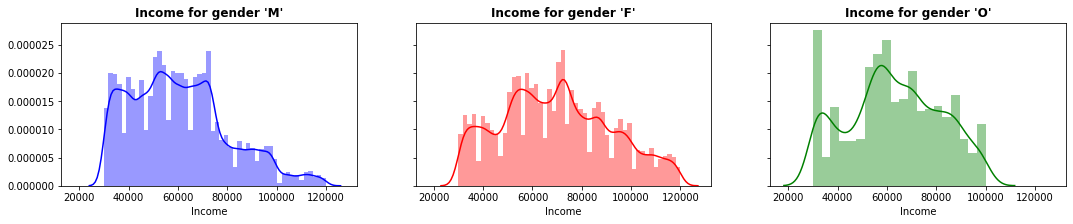

In [232]:
def dist_gender_var(i, data, var, gender, color, bins=False, xlim=False):
    """
    Plot a a trio of distribution plots by 3 main gender values.
    nrows=1, ncols=3
    
    INPUTS:
        -i: plot position
        -data: dataframe
        -var: column to plot
        -gender: specific gender (possible values are 'F', 'M' and 'O').
        -bins: if True, specify a range object.
        -xlim: if True, specify a tuple/list of lower and upper limits.
    """
    plt.sca(ax[i])
    if bins:
        plt.xlim(xlim[0], xlim[1])
        sns.distplot(data[var][data.gender_original==gender], color=color, bins=bins)
    else:
        sns.distplot(data[var][data.gender_original==gender], color=color)
    plt.xlabel(f'{var.capitalize()}')
    plt.title(f"{var.capitalize()} for gender '{gender}'", fontweight='bold')

    
fig, ax = plt.subplots(figsize=(18, 3),
                       nrows=1,
                       ncols=3,
                       sharex=True,
                       sharey=True)

print('***BOGO & DISCOUNT dataset***')
dist_gender_var(0, bogodis, 'income', 'M', 'blue')
dist_gender_var(1, bogodis, 'income', 'F', 'red')
dist_gender_var(2, bogodis, 'income', 'O', 'green')
plt.show()

It seems Male customers have an income distribution that is more skewed to the right, meaning that there is a smaller share of the male population that has a higher income level compared to the `Female` population, for example, which seems more evenly distributed.

***INFORMATIONAL dataset***


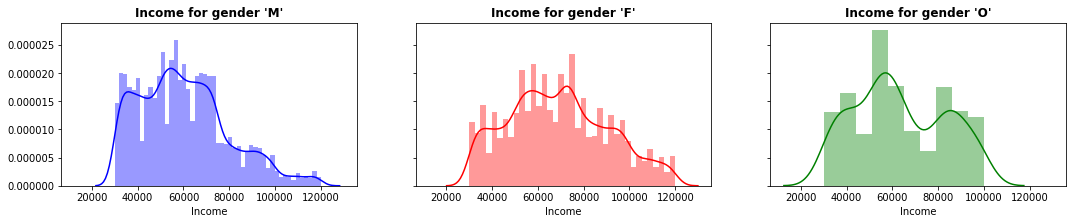

In [180]:
fig, ax = plt.subplots(figsize=(18, 3),
                       nrows=1,
                       ncols=3,
                       sharex=True,
                       sharey=True)

print('***INFORMATIONAL dataset***')
dist_gender_var(0, informational, 'income', 'M', 'blue')
dist_gender_var(1, informational, 'income', 'F', 'red')
dist_gender_var(2, informational, 'income', 'O', 'green')

plt.show()

A similar thing happens in the `informational` data, where male's income distribution is also skewed to the right. People that have identified as `Others` have a higher peak in this dataset, but this could be a result of a low sample size (less than 2% of customers fall in this category).

Let's see success by gender:

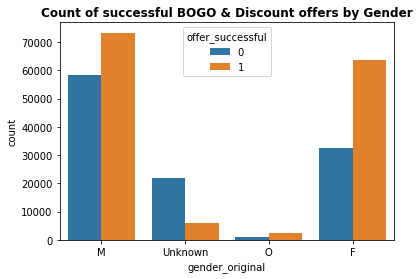

In [189]:
def count_gender_var(df, tit, hue='offer_successful'):
    """
    Plots a count of successes by gender.
    """
    sns.countplot(x='gender_original', hue=hue, data=df)
    plt.title(tit, fontweight='bold')
    plt.show()
    
count_gender_var(bogodis, tit='Count of successful BOGO & Discount offers by Gender')

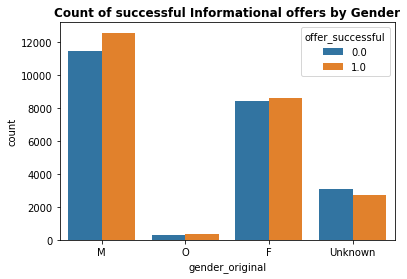

In [166]:
count_gender_var(informational, tit='Count of successful Informational offers by Gender')

As intuitively, the offers providing mode benefits to the customers seem to have a higher success ratio than merely information ones. This is particularly true for `Female`s. In contrast, when gender in `Unknown` the inverse is true. `Male`s tend to respond slightly better in BOGO and discount offers than to informational ones.

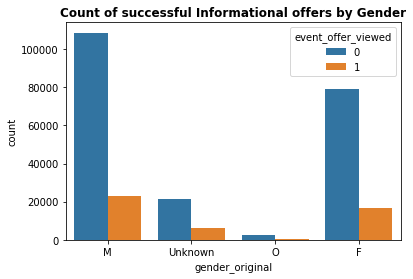

In [190]:
count_gender_var(bogodis, tit='Count of views for BOGO & Discount offers by Gender', hue='event_offer_viewed')

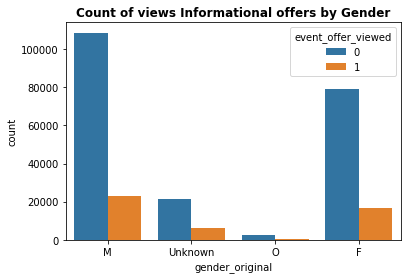

In [191]:
count_gender_var(bogodis, tit='Count of views Informational offers by Gender', hue='event_offer_viewed')

In both cases, the number of views is a fraction of the numbers of offers sent. No offer seem to be performing particularly better given the current groups (BOGO & Discount vs. Informational).

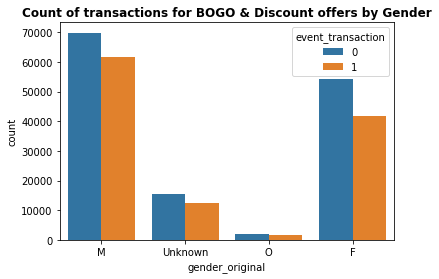

In [194]:
count_gender_var(bogodis, tit='Count of transactions for BOGO & Discount offers by Gender', hue='event_transaction')

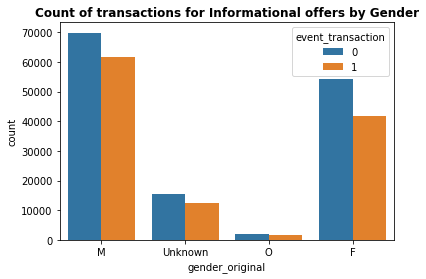

In [195]:
count_gender_var(bogodis, tit='Count of transactions for Informational offers by Gender', hue='event_transaction')

`Male`s display more transactions than `Female`s in both offer types. Let's see who spends more:

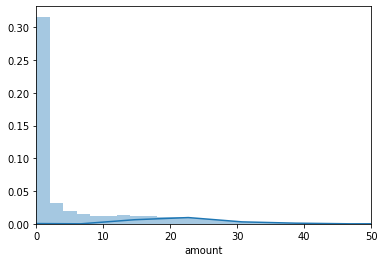

In [231]:
plt.xlim(0,50)
sns.distplot(bogodis.amount, bins=range(0,50,2))

***BOGO & DISCOUNT dataset***


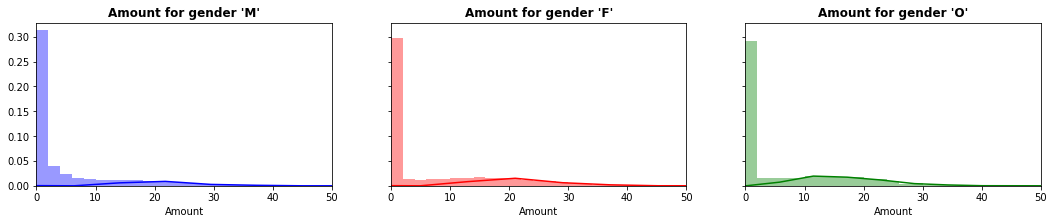

In [235]:
fig, ax = plt.subplots(figsize=(18, 3),
                       nrows=1,
                       ncols=3,
                       sharex=True,
                       sharey=True)

print('***BOGO & DISCOUNT dataset***')
plt.xlim(-1, 100, 5)
dist_gender_var(0, bogodis, 'amount', 'M', 'blue', bins=range(0,50,2), xlim=[0,50])
dist_gender_var(1, bogodis, 'amount', 'F', 'red', bins=range(0,50,2), xlim=[0,50])
dist_gender_var(2, bogodis, 'amount', 'O', 'green', bins=range(0,50,2), xlim=[0,50])
plt.show()

***INFORMATIONAL dataset***


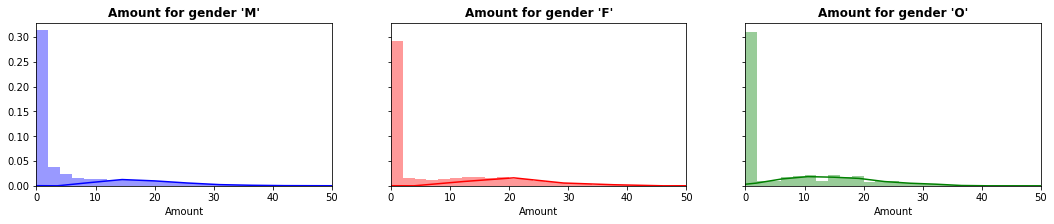

In [236]:
fig, ax = plt.subplots(figsize=(18, 3),
                       nrows=1,
                       ncols=3,
                       sharex=True,
                       sharey=True)

print('***INFORMATIONAL dataset***')
dist_gender_var(0, informational[informational.amount.notnull()], 'amount', 'M', 'blue', bins=range(0,50,2), xlim=[0,50])
dist_gender_var(1, informational[informational.amount.notnull()], 'amount', 'F', 'red', bins=range(0,50,2), xlim=[0,50])
dist_gender_var(2, informational[informational.amount.notnull()], 'amount', 'O', 'green', bins=range(0,50,2), xlim=[0,50])

plt.show()

All distributions are very similar and no particular gender seems to have higher spending habits in both tables.

## create final columns
After having performed some feature engineering, cleaned the tables, defined the target variables and handled missing values, it's time to expand the features slightly more so that the models may have more information to work with. The profiling part above shows there are informative features and it seems...


Finally, the tables will be filtered to contain only the identifiers and model features and the data will be saved.

The modeling part will be performed in a new notebook so that we can keep things organized and separated.

In [183]:
def aggregator(col, data, _agg='sum'):
    """
    Returns a column grouped by person_id and aggregated by the specified metric.
    INPUTS:
        - col: column to aggregate
        - data: dataframe that has the col
        - _agg: aggregation function (Ex: mean, sum, median, etc.)
        
    OUTPUT:
        - Returns the provided dataframe plus the computed column.
    """
    _ = pd.DataFrame(data.groupby('person')[col].agg(_agg)).reset_index()
    
    if _agg == pd.Series.nunique:
        _.rename(columns={col:'count_'+col}, inplace=True)
    else:
        _.rename(columns={col:_agg+'_'+col}, inplace=True)
    
    return pd.merge(left=data, right=_, on='person', how='left')

In [184]:
print(bogodis.shape, informational.shape)
for col in ['event_offer_received', 'event_offer_viewed',
            'event_transaction', 'event_offer_completed', 'amount']:
    bogodis = aggregator(col, bogodis)
    bogodis[col] = bogodis[col].fillna(0.)
    
    informational = aggregator(col, informational)
    informational[col] = informational[col].fillna(0.)

for col in ['difficulty', 'amount']:
    bogodis = aggregator(col, bogodis, _agg='mean')
    bogodis[col] = bogodis[col].fillna(0.)
    
    informational = aggregator(col, informational, _agg='mean')
    informational[col] = informational[col].fillna(0.)
    
for col in ['received_id']:
    bogodis = aggregator(col, bogodis, _agg=pd.Series.nunique)
    bogodis[col] = bogodis[col].fillna(0.)
    
    informational = aggregator(col, informational, _agg=pd.Series.nunique)
    informational[col] = informational[col].fillna(0.)
    
print(bogodis.shape, informational.shape)

(258649, 40) (47488, 42)
(258649, 48) (47488, 50)


In [185]:
features = [ # identifiers
             'person',
             'offer_id',
             'received_id',
             
             # target
             'offer_successful',
            
             # feats
             'sum_event_offer_received',
             'sum_event_offer_viewed',
             'sum_event_transaction',
             'sum_event_offer_completed',
             'sum_amount',
             'mean_difficulty',
             'mean_amount',
             'count_received_id',
             'channel_email',
             'channel_mobile',
             'channel_social',
             'channel_web',
             'age',
             'income',
             'gender_F',
             'gender_M',
             'gender_O',
             'gender_Unknown',
             #'became_member_on',
             'year',
             'month',
             'day',
             'week',
            ]

print(bogodis[features].shape, informational[features].shape)
print(bogodis[features].drop_duplicates().shape, informational[features].drop_duplicates().shape)
print(bogodis[features].dropna(axis=0, how='any').drop_duplicates().shape, informational[features].dropna(axis=0, how='any').drop_duplicates().shape)

(258649, 26) (47488, 26)
(109367, 26) (26470, 26)
(61042, 26) (15235, 26)


In [186]:
final_bogodis = bogodis[features].dropna(axis=0, how='any').drop_duplicates().copy()
final_bogodis.offer_successful.value_counts()

0    36834
1    24208
Name: offer_successful, dtype: int64

In [187]:
final_informational = informational[features].dropna(axis=0, how='any').drop_duplicates()
final_informational.offer_successful.value_counts()

0.0    9473
1.0    5762
Name: offer_successful, dtype: int64

## save the cleaned data
These tables will be used in another notebook dedicated to modeling.

In [ ]:
final_bogodis.to_csv('data/bogodis.csv', index=False)
final_informational.to_csv('data/informational.csv', index=False)

The modeling part will continue in the notebook `Starbucks_Capstone_notebook_part2.ipynb`.